# Naive Bayes Project
#### Team:  Neha Boi, Liam Nguyen
#### CECS 550

In [1]:
# Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constants
FILE_NAME = "diabetes.csv"
TRAIN_TEST_RATIO = 0.8 
TN = 0
FP = 0 
FN = 0
TP = 0 

In [3]:
# Funtions
def p_x_given_y(x, mean_y, variance_y):
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    return p

def calulate_posterior(prior_probability,data_list,mean_list,variance_list):
    result = prior_probability;
    for i in range(len(data_list)):
        result = result * p_x_given_y(data_list[i],mean_list[i],variance_list[i])
    return result

def clasifier(test_entry):
    global TN , TP, FP, FN
    yes_posterior_prob = calulate_posterior(p_s,test_entry[0:Number_of_features],Yes_mean_list,Yes_Variance_list)
    no_posterior_prob = calulate_posterior(p_f,test_entry[0:Number_of_features],No_mean_list,No_Variance_list)
    if yes_posterior_prob > no_posterior_prob:
        predicted_prob = 1
    else:
        predicted_prob = 0
    if(predicted_prob == 0 and test_entry[Number_of_features]==0):
        TN = TN + 1
    if(predicted_prob == 1 and test_entry[Number_of_features]==1):
        TP = TP + 1
    if(predicted_prob == 1 and test_entry[Number_of_features]==0):
        FP = FP + 1
    if(predicted_prob == 0 and test_entry[Number_of_features]==1):
        FN = FN + 1


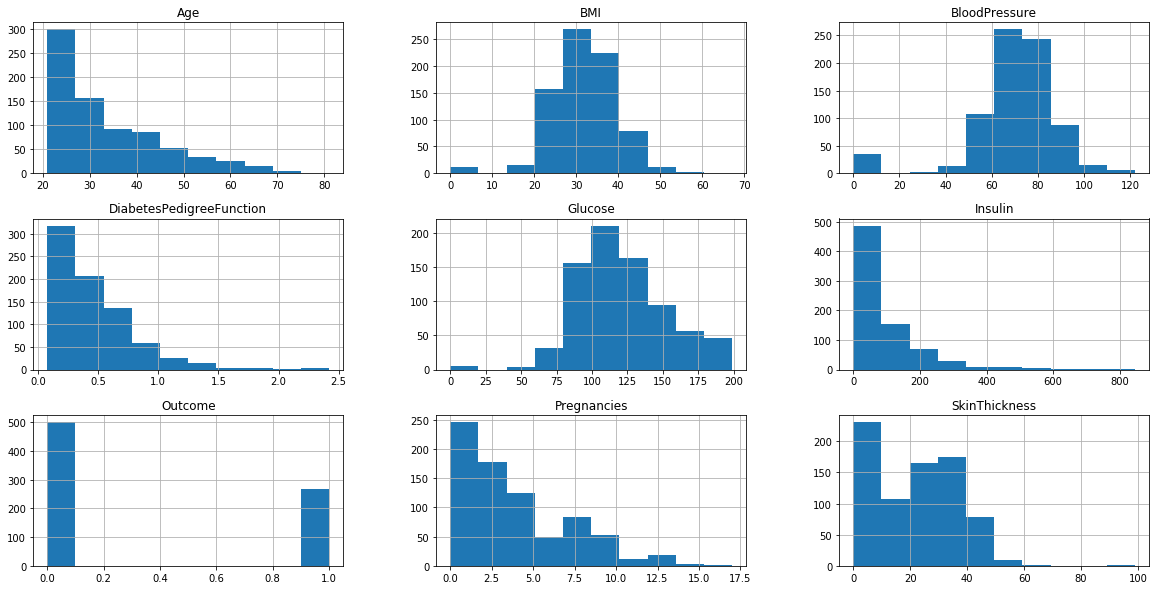

In [4]:
data = pd.read_csv(FILE_NAME)
data.hist(figsize=(20, 10));

In [22]:
msk = np.random.rand(len(data)) < TRAIN_TEST_RATIO

# Split into train and test set
train_data = data[msk] 
test_set = data[~msk]

column_list = train_data.columns.tolist()
Number_of_features = len(train_data.columns)-1
Outcome_Column = train_data.columns[Number_of_features]

data_means = train_data.groupby(Outcome_Column).mean()
data_variance = train_data.groupby(Outcome_Column).var()

Yes_outcome = 1
No_outcome = 0

n_f = train_data[Outcome_Column][train_data[Outcome_Column] == No_outcome].count()
n_s = train_data[Outcome_Column][train_data[Outcome_Column] == Yes_outcome].count()
total = train_data[Outcome_Column].count()

# Calculate priors
p_f = n_f / total
p_s = n_s / total

# Gather stats
No_mean_list = list()
No_Variance_list = list()
Yes_mean_list = list()
Yes_Variance_list = list()

for x in range(Number_of_features):
    No_mean_list.append(data_means[column_list[x]][data_variance.index == No_outcome].values[0])
    No_Variance_list.append(data_variance[column_list[x]][data_variance.index == No_outcome].values[0])
    Yes_mean_list.append(data_means[column_list[x]][data_variance.index == Yes_outcome].values[0])
    Yes_Variance_list.append(data_variance[column_list[x]][data_variance.index == Yes_outcome].values[0])

[3.265151515151515, 109.08080808080808, 68.54040404040404, 19.555555555555557, 66.02525252525253, 30.60151515151514, 0.4338863636363635, 30.853535353535353]


In [ ]:
# Run model
for index,row in test_set.iterrows():
    clasifier(row.values)

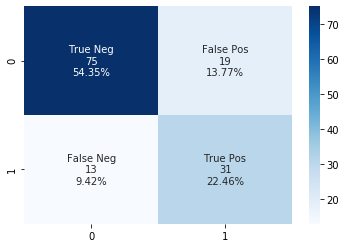

In [6]:
# Confusion matrix
cf_matrix = np.array([[TN, FP], [FN, TP]])
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

In [20]:
accuracy = (TP + TN) / (TP + FP + TN +FN)
error = (FP + FN) / (TP + FP + TN +FN)
sensitivity = TP / (FN + TP)
specificity = TN / (TN + FP)

report_stats = pd.DataFrame({
    "Accuracy": [accuracy],
    "Error: ": [error],
    "Sensitivity: ": [sensitivity],
    "Specificity: ": [specificity]
})

print(report_stats.to_string(index=False))

 Accuracy   Error:   Sensitivity:   Specificity: 
 0.768116  0.231884       0.704545       0.797872


In [21]:
print("Interpretation\n")
print(f"The Gaussian model gives us {accuracy * 100:.2f}% accuracy with {error * 100:.2f}% error\n")
print(f"Sensitivity shows that this model will correctly return positive result for {sensitivity * 100:.2f}% of people who have the disease and false negative for {(1 - sensitivity) * 100:.2f}% of people who have the disease and should have tested positive.\n")
print(f"Specificity shows that this model will correctly return negative result for {specificity * 100:.2f}% of people who don't have the disease and false positive for {(1 - specificity) * 100:.2f}% of people who don't have the disease and should have tested negative.\n")

Interpretation

The Gaussian model gives us 76.81% accuracy with 23.19% error

Sensitivity shows that this model will correctly return positive result for 70.45% of people who have the disease and false negative for 29.55% of people who have the disease and should have tested positive.

Specificity shows that this model will correctly return negative result for 79.79% of people who don't have the disease and false positive for 20.21% of people who don't have the disease and should have tested negative.

